**Problem Statement:** Ridge and Lesso Regression both are Regression type regularisation technique.

But,there is a major difference between the two methods.That is : Lesso can reduce the value of any weight associated to the feature , $w_i = 0$.Thus it helps in reduction of dimension of the feature space.

But,Ridge regression can't update any weight to 0 , i.e.  $w_i \ne 0$

In the following project,i will expalain the hands-on implementation of the above mentioned two Regularisation Techniques using 'Mart-sell' data set avaiable at :[https://datahack.analyticsvidhya.com/contest/practice-problem-big-mart-sales-iii/#ProblemStatement](https://)



# ***discussion on Ridge and Lasso Regresion***

## Ridge Regression

 One of the algorithm to deal with this multi-collinearity is **Ridge Regression.**

Let's discuss some of the points in Ridge Regression.



1.   Ridge Regression is a Regularisation Technique.'Regularisation' means by using some hyper-parameter,the value of the parameters can be regularised.That has been accomplished in the following way:


*   Instead of using mere a cost function like this:
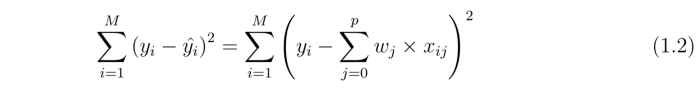
*   We will use this:
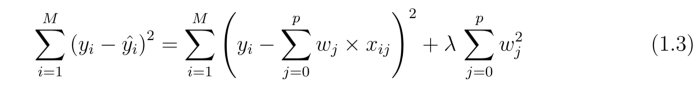

Where, $\lambda >0$ is a hyper-parameter.


2.   As,the cost function tends to decrease during training, $w_i$ s will be updated such a way ,some of the $w_i$ will be updated  $\to$ 0.

As, $w_i$'s  $\to$ 0,the collineared features get less pripority and that overfitting ambiguity due to multi-collinearity can be avoided.



## Lasso Regression

But,there are some disadvantages of Ridge Regression.


1.   Although,Ridge helps to produce some weights tends to 0, but not equal to 0.So,Ridge can't reduce the dimension of the feature space.

2. the error function that has been used here is:
 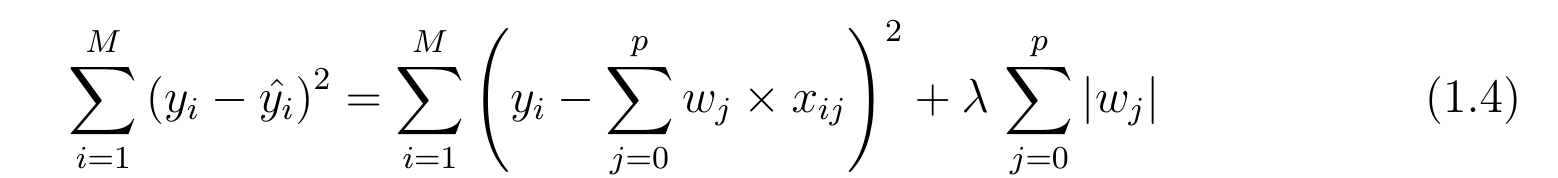

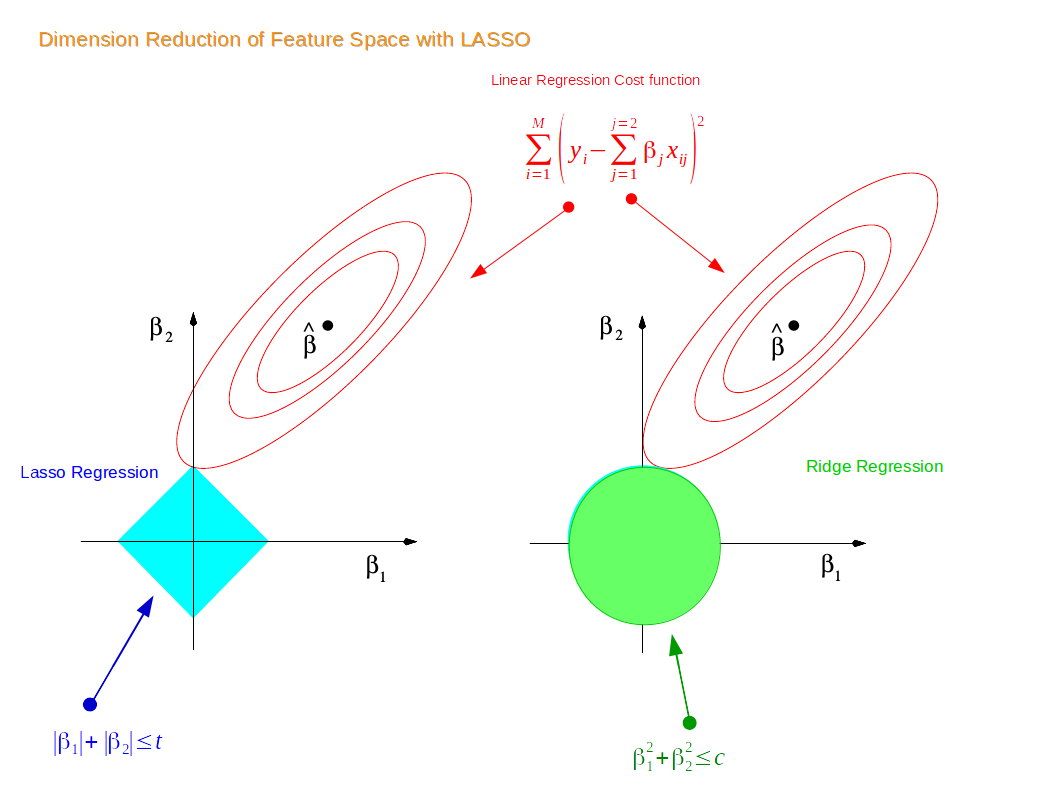


When, weight of any faeture hits the corner of the diamond while updating its value,that becomes 0.That means the feature will get 0 weightag.Thus the dimension of the feature space get reduced.


# ***Data Loading***

## Importing Important libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import Series, DataFrame


In [8]:
from google.colab import drive
drive.mount('/content/mydrive')

Mounted at /content/mydrive


In [9]:
import pandas as pd
train = pd.read_csv('/content/mydrive/MyDrive/train_v9rqX0R.csv')
train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


# Exploratory Data Analysis

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In the training data frame :

1.   there are 12 features.
2.   there are 4 float64 data type features , 1 int64 data type feature , 7 object type feature.
3.  There are two features where NaN value pesent: 


                    1.   Item_weight
                    2.   Outlet_Size                















In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


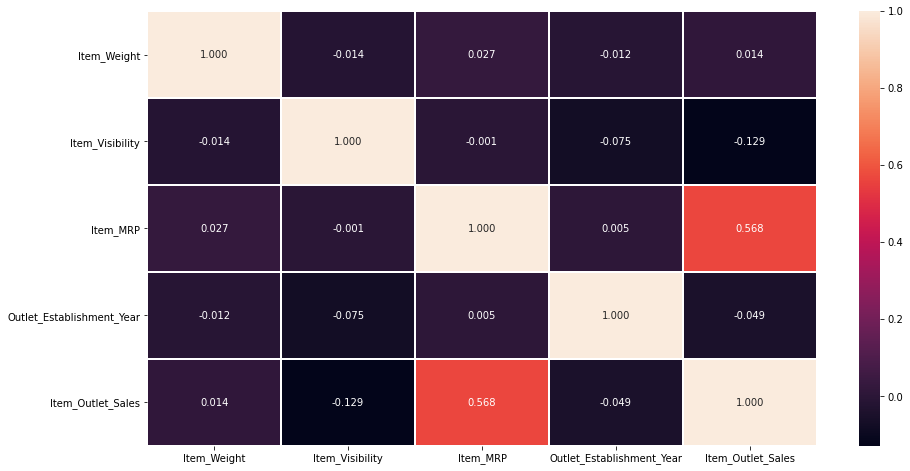

In [12]:
f,ax = plt.subplots(figsize=(15,8)) #Add a subplot to the current figure.
sns.heatmap(train.corr(), annot=True, linewidths=.5, fmt= '.3f',ax=ax)

As,it is visible from the above heat map,the magnitude of correlation between any two feature is  small(i.e.  $ <0.6 $).





# ***Data Preprocessing***

In the training data frame, 7 object data type features.

In [13]:
mylist = list(train.select_dtypes(include=['object']).columns)



In [14]:
mylist

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

mylist conatins the name of the object data type features.

In [15]:
#  'Outlet_Establishment_Year' contains the year of establishment of the outlet.

train['Outlet_Establishment_Year']=2021-train['Outlet_Establishment_Year']

# Now,'Otlet_establishment_Year' conatins the information of how many years the outlet is established.

In [16]:
train['Outlet_Establishment_Year']

0       22
1       12
2       22
3       23
4       34
        ..
8518    34
8519    19
8520    17
8521    12
8522    24
Name: Outlet_Establishment_Year, Length: 8523, dtype: int64

In [17]:
train['Item_Visibility'] = train['Item_Visibility'].replace(0,np.mean(train['Item_Visibility']))

In [18]:
train['Outlet_Size'].fillna('Small',inplace=True)


In [19]:
train['Outlet_Size'].isna().sum()

0

In [20]:
train['Item_Weight'].fillna(train['Item_Weight'].mean() , inplace=True)

In [21]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


Now,there is no NaN value present in any of the featurs.

In [22]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

## To encode the object data type into neumeric type.

In [23]:
from sklearn import preprocessing 
  
# label_encoder object knows how to understand word labels. 
l_encd = preprocessing.LabelEncoder() 



In [24]:
col=mylist # Creating a list of each column-name and storing in 'col'

for i in col:
  train[i]=l_encd.fit_transform(train[i])  #".fit_transform" label encoding each features column-wise

In [25]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [26]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   int64  
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   int64  
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   int64  
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   int64  
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   int64  
 9   Outlet_Location_Type       8523 non-null   int64  
 10  Outlet_Type                8523 non-null   int64  
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(8)
memory usage: 799.2 KB


See,all the object data type is being converted into neumeric data type.

# ***Building the models:***

## Ridge Regression

In [27]:
import matplotlib.pyplot as plt



# importing linear regression

from sklearn.linear_model import Ridge

rreg = Ridge(alpha=0.5)

# for cross validation

from sklearn.model_selection import train_test_split

train1 = train.drop('Item_Outlet_Sales',1)

x_train, x_cv, y_train, y_cv = train_test_split(train1,train.Item_Outlet_Sales, test_size =0.3)

# training a linear regression model on train

rreg.fit(x_train,y_train)

# predicting on cv

pred_cv = rreg.predict(x_cv)

# calculating mse

mse = np.mean((pred_cv - y_cv)**2)

print('Mean squared error: ',mse)



# evaluation using r-square

print('R2 score: ',rreg.score(x_cv,y_cv))



Mean squared error:  1477153.850260572
R2 score:  0.5089103027047412


In [28]:
rreg.coef_

array([-2.39617558e-02, -2.53653746e+00,  1.06692423e+01, -1.60606213e+03,
        1.23184621e-02,  1.50875866e+01,  5.29093883e+01, -6.26079047e-01,
       -1.44572881e+02, -1.16240521e+02,  8.35087353e+02])

In [29]:
coeff = DataFrame(x_train.columns)

coeff['Coefficient Estimate'] = Series(rreg.coef_)
coeff

,0,Coefficient Estimate
0,Item_Identifier,-0.023962
1,Item_Weight,-2.536537
2,Item_Fat_Content,10.669242
3,Item_Visibility,-1606.062132
4,Item_Type,0.012318
5,Item_MRP,15.087587
6,Outlet_Identifier,52.909388
7,Outlet_Establishment_Year,-0.626079
8,Outlet_Size,-144.572881
9,Outlet_Location_Type,-116.240521


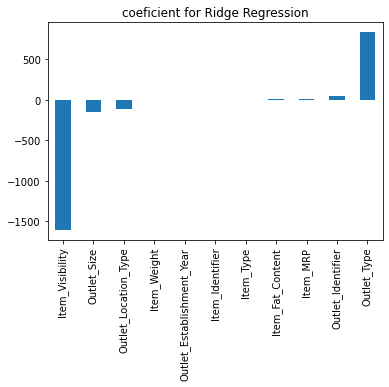

In [30]:
#checking the magnitude of coefficients

predictors = x_train.columns

coef = Series(rreg.coef_,predictors).sort_values()

coef.plot(kind='bar', title='coeficient for Ridge Regression')



## Lasso regression

In [31]:
from sklearn.linear_model import Lasso

lassoReg = Lasso(alpha=0.3, normalize=True)

lassoReg.fit(x_train,y_train)

pred = lassoReg.predict(x_cv)

# calculating mse

mse = np.mean((pred_cv - y_cv)**2)

print('Mean Squared Error: ',mse)



scr = lassoReg.score(x_cv,y_cv)

print('R2 score: ',scr)

Mean Squared Error:  1477153.850260572
R2 score:  0.5064039910100138


In [32]:
coeff = DataFrame(x_train.columns)

coeff['Coefficient Estimate'] = Series(lassoReg.coef_)
coeff

,0,Coefficient Estimate
0,Item_Identifier,-0.000000
1,Item_Weight,-0.000000
2,Item_Fat_Content,0.000000
3,Item_Visibility,-1315.634440
4,Item_Type,0.000000
5,Item_MRP,14.708618
6,Outlet_Identifier,68.452915
7,Outlet_Establishment_Year,0.000000
8,Outlet_Size,-92.537696
9,Outlet_Location_Type,-0.000000


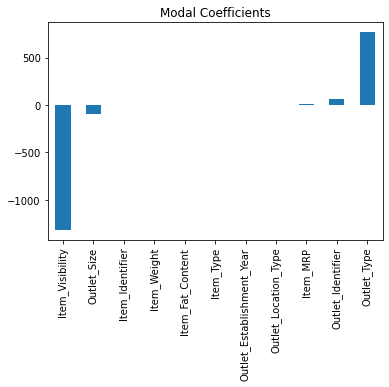

In [33]:
predictors = x_train.columns

coef = Series(lassoReg.coef_,predictors).sort_values()

coef.plot(kind='bar', title='Modal Coefficients')

# ***Conclusion :***



In case of Lasso regression model, the features that has been assigned to $0$ weights are ['Item_Identifier' , 'Item_Weight' , 'Item_Fat_Content' , 'Item_Type' , 'Outlet_Establishment_Year' , 'Outlet_Location_Type' ] the number of dimension of the feature space has reduced been reduced by 6.

But, in case of Ridge Regression , although the weights are close to 0, but the weights can't be 0. So, it can't reduce the dimension of the feature space.








